In [1]:
import compas
from compas.datastructures import Mesh
from compas_plotters import MeshPlotter

mesh = Mesh()

a = mesh.add_vertex(x=0.0, y=0.0)
b = mesh.add_vertex(x=1.0, y=0.0)
c = mesh.add_vertex(x=1.0, y=1.0)
d = mesh.add_vertex(x=0.0, y=1.0)

f = mesh.add_face([a, b, c, d])

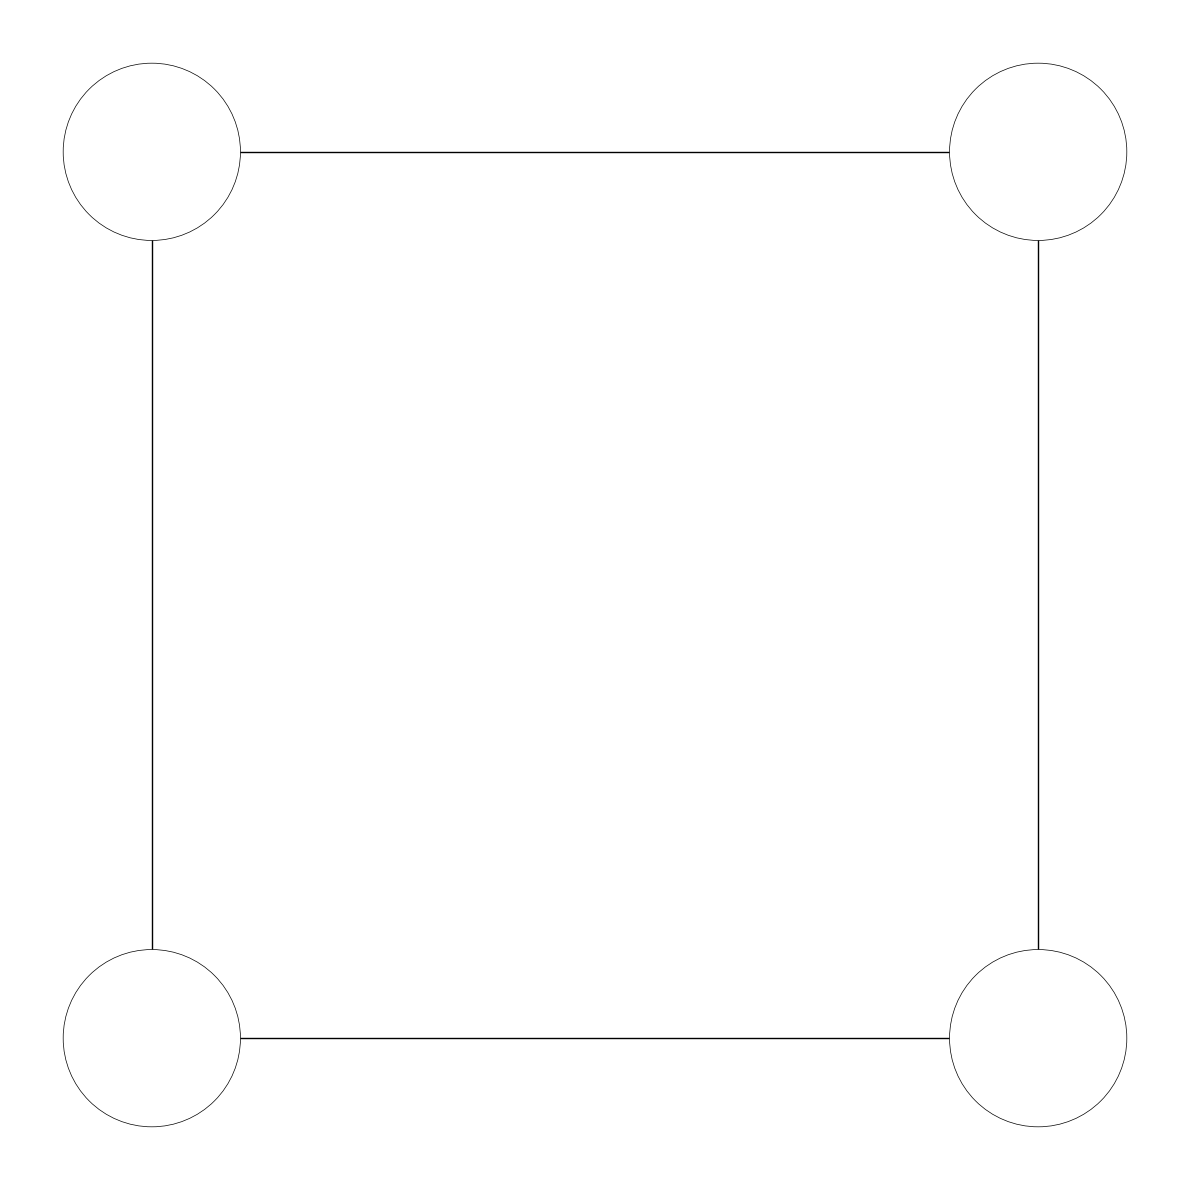

In [2]:
plotter = MeshPlotter(mesh)

plotter.draw_edges()
plotter.draw_vertices()

plotter.show()

In [3]:
for key in mesh.vertices():
    print("vertice key:", key)
for key in mesh.faces():
    print("face key:", key)
    print(key, "(vertices)", mesh.face_vertices(key))

vertice key: 0
vertice key: 1
vertice key: 2
vertice key: 3
face key: 0
0 (vertices) [0, 1, 2, 3]


In [102]:
def mesh_sdivide(mesh):
    faces = list(mesh.faces())
    factor = len(faces)
    new_keys = []
    for face in faces:
        vertice_coords =  mesh.face_coordinates(face, axes='xy')
        vertice_keys = mesh.face_vertices(face)
        face_centroid = mesh.face_centroid(face)
        
        new_vertice_keys = []
        for i,v_coord in enumerate(vertice_coords):
            if i < len(vertice_coords)-1:
                temp_mid_pt = compas.geometry.midpoint_point_point_xy(v_coord, vertice_coords[i+1])
            else:
                temp_mid_pt = compas.geometry.midpoint_point_point_xy(v_coord, vertice_coords[0])
            temp_v_key = mesh.add_vertex(x=temp_mid_pt[0],y=temp_mid_pt[1])
            new_vertice_keys.append(temp_v_key)
        
        temp_v_key = mesh.add_vertex(x=face_centroid[0] + 1/factor, y=face_centroid[1] + 1/factor) 
        new_vertice_keys.append(temp_v_key)
        new_vertice_keys.extend(vertice_keys)
        
        new_keys.append(new_vertice_keys)
        
    for kl in new_keys:
        mesh.add_face([kl[5],kl[0],kl[4],kl[3]])
        mesh.add_face([kl[0],kl[6],kl[1],kl[4]])
        mesh.add_face([kl[4],kl[1],kl[7],kl[2]])
        mesh.add_face([kl[3],kl[4],kl[2],kl[8]])
        
        
    return mesh

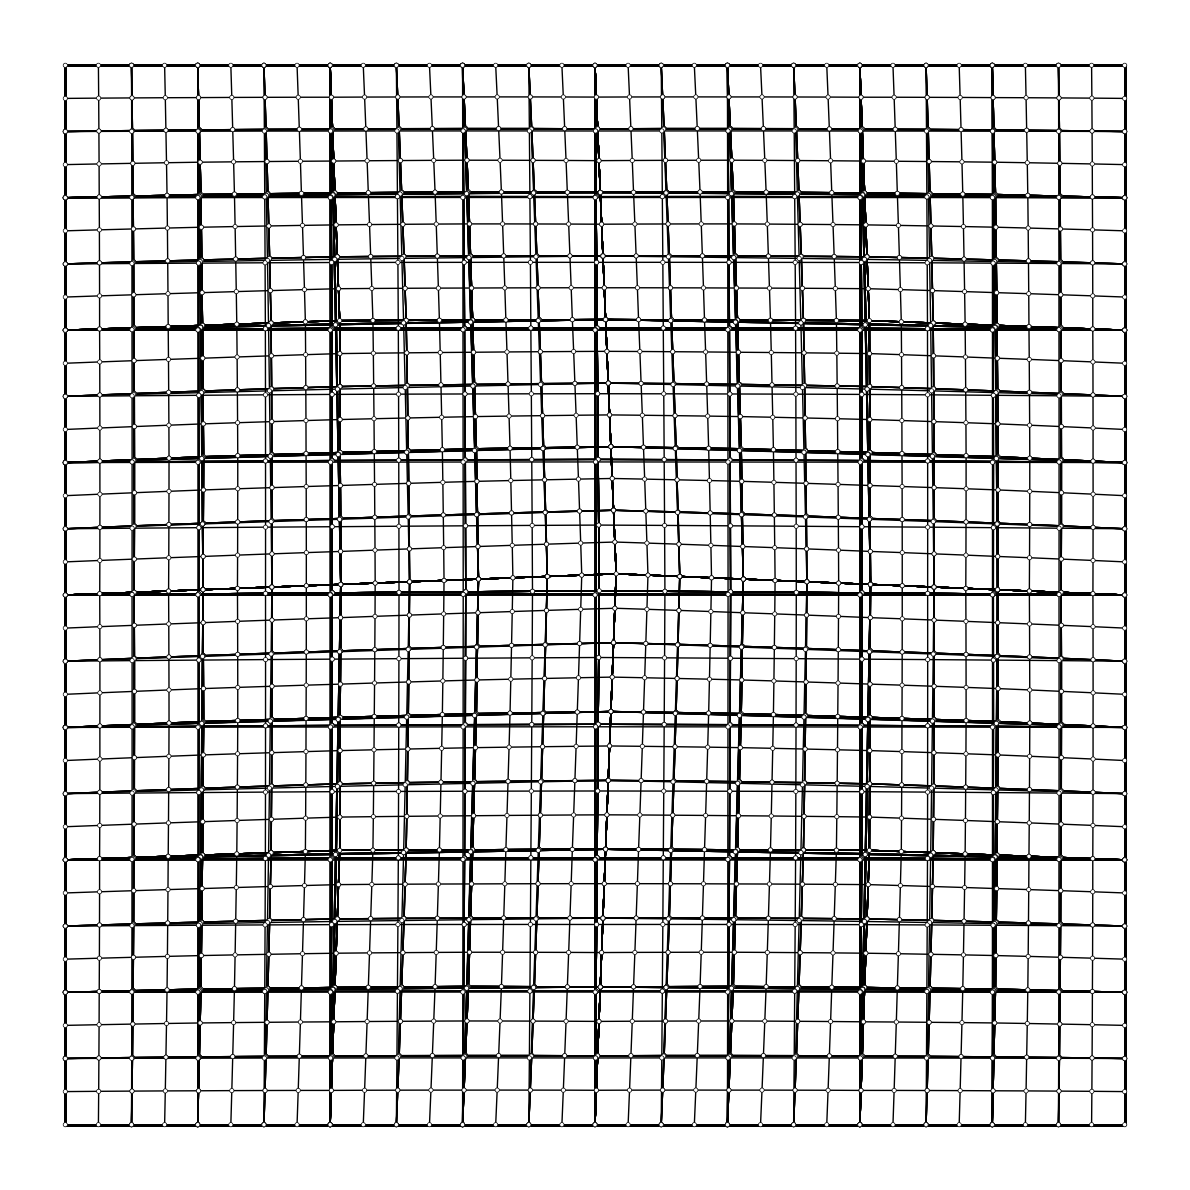

In [103]:
mesh = Mesh()

s = 50

a = mesh.add_vertex(x=0.0*s , y=0.0*s)
b = mesh.add_vertex(x=1.0*s, y=0.0*s)
c = mesh.add_vertex(x=1.0*s, y=1.0*s)
d = mesh.add_vertex(x=0.0*s, y=1.0*s)

f = mesh.add_face([a, b, c, d])

for i in range(5):
    mesh = mesh_sdivide(mesh)

plotter = MeshPlotter(mesh)

plotter.draw_edges()
plotter.draw_vertices()

plotter.show()

In [89]:
# same in 3d... 
# ask Gonzalo about better functions for the same trick :)
